In [95]:
import pandas as pd
from glob import glob

In [96]:
dfl = []
files = glob('../../data/hope/*.csv')
for f in files[5:]:
    tmp = pd.read_csv(f, sep=';').iloc[:,:-1].dropna(subset=['mese'])
    if tmp.misura.apply(float).max() > 500:
        print(f, 'yep', tmp.misura.apply(float).max())
        break
    tmp['stn'] = f.split('/')[-1]
    dfl.append(tmp)
    
df = pd.concat(dfl)
df['misura'] = df.misura.apply(lambda x: float(str(x).replace(',','')))

../../data/hope/pluvio_2560-1921-2005.csv yep 606.0


In [97]:
good_stn = df.groupby('stn').count().sort_values('mese', ascending=False)[:247].index

In [98]:
good_df = df[df.stn.isin(good_stn)]

In [99]:
good_df.groupby('mese').std()

,anno,misura
mese,,
1.0,25.584533,77.543800
2.0,25.584533,61.201731
3.0,25.584533,56.467496
4.0,25.584533,47.114973
5.0,25.584533,33.073528
6.0,25.584533,23.271990
7.0,25.584533,21.047951
8.0,25.584533,27.455873
9.0,25.584533,46.234870


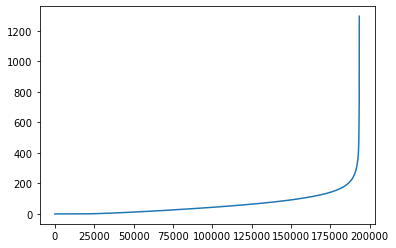

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(good_df['misura'].sort_values().values)

In [93]:
3.5/2

1.75